# 1. Problem Statement and Data Description

**Problem Statement**: This dataset contains transactional data for a UK-based online retailer from 2010 to 2011. It includes information about customers and their purchase history.

**Data Description**:

- **InvoiceNo Invoice number**: A 6-digit integral number uniquely assigned to each transaction.
- **StockCode**: Product (item) code
- **Description**: Product (item) name
- **Quantity**: The quantities of each product (item) per transaction
- **InvoiceDate**: The day when each transaction was generated
- **UnitPrice**: Unit price (Product price per unit)
- **CustomerID**: Customer number (Unique ID assigned to each customer)
- **Country**: Country name (The name of the country where each customer resides)

# 2. Loading Required Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load dataset
df = pd.read_csv(r"C:/Users/user/OneDrive/Desktop/OnlineRetail.csv", encoding='latin1')

In [10]:
# Display the first 5 records
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [11]:
# Display the last 5 records
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/09/2011 12:50,4.95,12680.0,France


In [12]:
df.shape

(541909, 8)

In [13]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# 3.Data Preprocessing

In [14]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
# Fill missing values or drop rows/columns with missing values
df = df.dropna()

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [47]:
# Convert InvoiceDate to datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [19]:
# Create TotalAmount column 
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 # Calculate the total transaction value per customer
df['TransactionValue'] = df['Quantity'] * df['UnitPrice']

In [69]:
# Aggregate the customer-level features: TotalSpent and TransactionCount
customer_features = df.groupby('CustomerID').agg(
    TotalSpent=('TransactionValue', 'sum'),
    TransactionCount=('InvoiceNo', 'nunique')
).reset_index()

In [70]:
# Verify the columns exist before scaling
print(customer_features.columns)  # Check the columns

Index(['CustomerID', 'TotalSpent', 'TransactionCount'], dtype='object')


In [74]:
avg_transaction_value = df.groupby('CustomerID')['TransactionValue'].mean().reset_index()

# Print the avg_transaction_value to ensure it's correct
print(avg_transaction_value.head())

   CustomerID  TransactionValue
0     12346.0          0.000000
1     12347.0         23.681319
2     12348.0         57.975484
3     12349.0         24.076027
4     12350.0         19.670588


In [72]:
# Convert scaled data back to a DataFrame for better readability
scaled_df = pd.DataFrame(customer_features_scaled, columns=['TotalSpent', 'TransactionCount', 'AvgTransactionValue'])
print(scaled_df.head())

   TotalSpent  TransactionCount  AvgTransactionValue
0   -0.231001         -0.329362            -0.226527
1    0.293432          0.206102            -0.040513
2   -0.012316         -0.115176             0.228864
3   -0.017146         -0.436455            -0.037413
4   -0.190312         -0.436455            -0.072017


In [77]:

# Merge the average transaction value back to the customer_features DataFrame
customer_features = pd.merge(customer_features, avg_transaction_value[['CustomerID', 'TransactionValue']], on='CustomerID', how='left')

In [78]:
# Rename the column to AvgTransactionValue
customer_features.rename(columns={'TransactionValue': 'AvgTransactionValue'}, inplace=True)

In [79]:
# Print the columns to check if AvgTransactionValue exists
print(customer_features.columns)

Index(['CustomerID', 'TotalSpent', 'TransactionCount', 'AvgTransactionValue'], dtype='object')


In [80]:
# Now scale the features (TotalSpent, TransactionCount, AvgTransactionValue)
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalSpent', 'TransactionCount', 'AvgTransactionValue']])

In [81]:
# Convert the scaled data back into a DataFrame for better readability
scaled_df = pd.DataFrame(customer_features_scaled, columns=['TotalSpent', 'TransactionCount', 'AvgTransactionValue'])
print(scaled_df.head())

   TotalSpent  TransactionCount  AvgTransactionValue
0   -0.231001         -0.329362            -0.226527
1    0.293432          0.206102            -0.040513
2   -0.012316         -0.115176             0.228864
3   -0.017146         -0.436455            -0.037413
4   -0.190312         -0.436455            -0.072017


In [75]:
# Now calculate the average transaction value per InvoiceNo
avg_transaction_values = df.groupby('InvoiceNo')['TransactionValue'].sum()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,TransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


# 4.Exploratory Data Analysis (EDA)

In [1]:
df.describe('mean') # Descriptive statistics 

NameError: name 'df' is not defined

# Distribution of Total Amount Spent

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

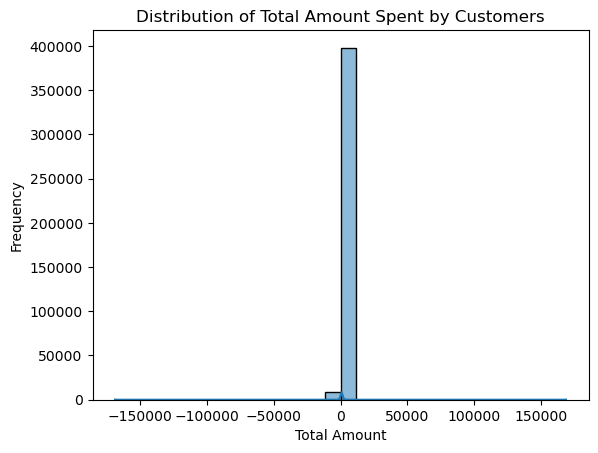

In [24]:
sns.histplot(df['TotalAmount'], bins=30, kde=True)
plt.title('Distribution of Total Amount Spent by Customers')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Top 10 Products by Sales

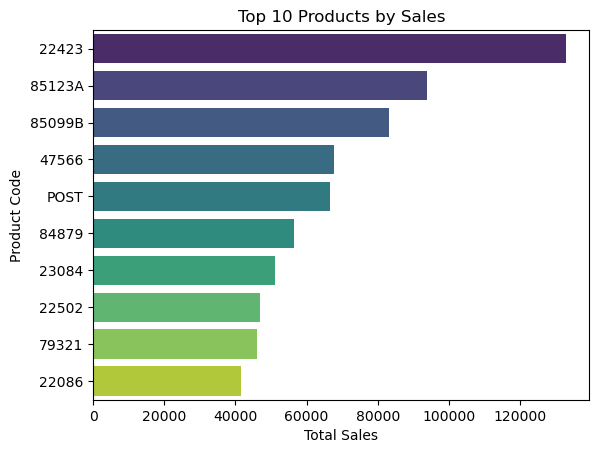

In [25]:
top_products = df.groupby('StockCode')['TotalAmount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Code')
plt.show()

# Customer Transaction Frequency

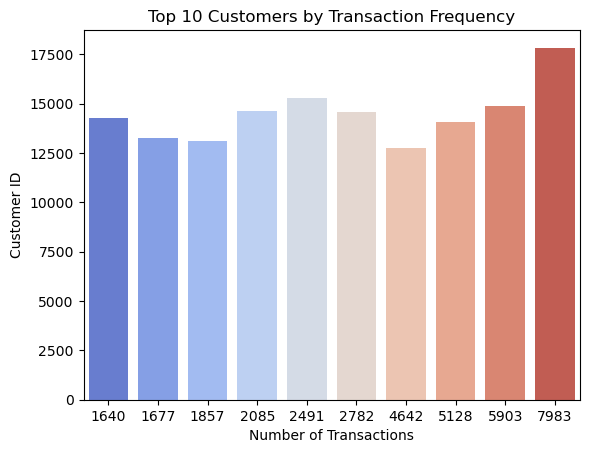

In [26]:
transaction_freq = df['CustomerID'].value_counts().head(10)
sns.barplot(x=transaction_freq.values, y=transaction_freq.index, palette='coolwarm')
plt.title('Top 10 Customers by Transaction Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer ID')
plt.show()

# Total Spent by Country

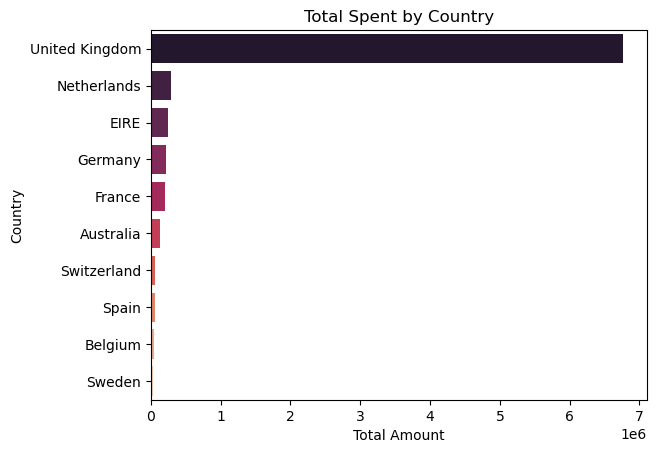

In [27]:
total_spent_by_country = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=total_spent_by_country.values, y=total_spent_by_country.index, palette='rocket')
plt.title('Total Spent by Country')
plt.xlabel('Total Amount')
plt.ylabel('Country')
plt.show()

# Average Transaction Value Distribution

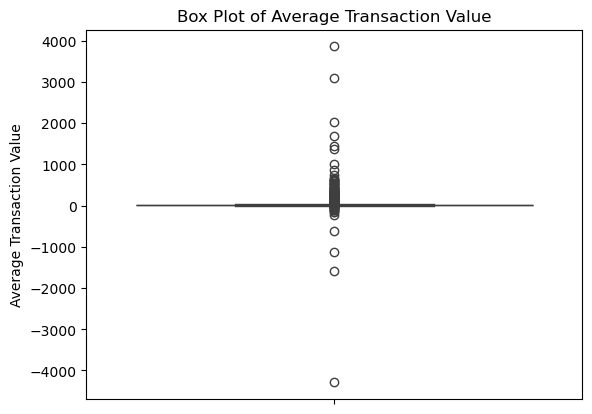

In [85]:
sns.boxplot(y=customer_features['AvgTransactionValue'])
plt.title('Box Plot of Average Transaction Value')
plt.ylabel('Average Transaction Value')
plt.show()

# Heatmap of Feature Correlations

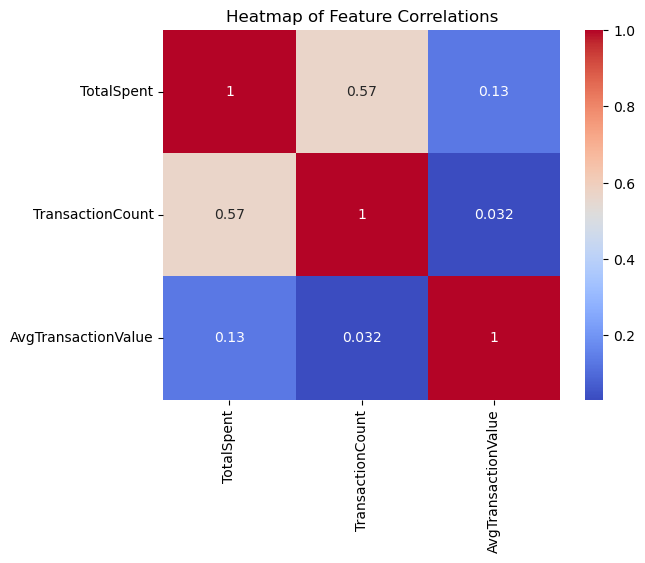

In [86]:
correlation_matrix = customer_features[['TotalSpent', 'TransactionCount', 'AvgTransactionValue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Hypothesis Testing

In [56]:
# Hypothesis: Is the average transaction value different from $50?
mu = 50  # Population mean to test against
t_stat, p_value = ttest_1samp(avg_transaction_values, mu)

print(f'Test Statistic: {t_stat}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
    print("Conclusion: The average transaction value is different from $50.")
else:
    print("Fail to reject the null hypothesis (H0).")
    print("Conclusion: There is not enough evidence to say that the average transaction value is different from $50.")  

Test Statistic: 23.914392153109358
p-value: 8.22896109653852e-125
Reject the null hypothesis (H0).
Conclusion: The average transaction value is different from $50.


# K-Means Clustering

In [61]:
from sklearn.metrics import mean_squared_log_error as msle, mean_squared_error as mse, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

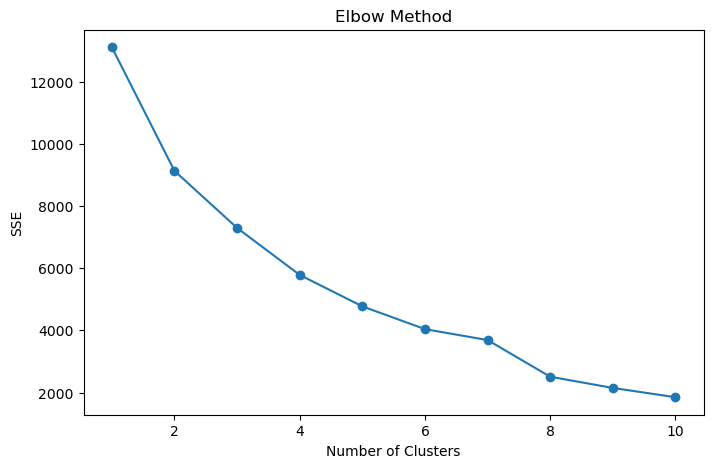

In [83]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

 # Cluster Centers Visualization

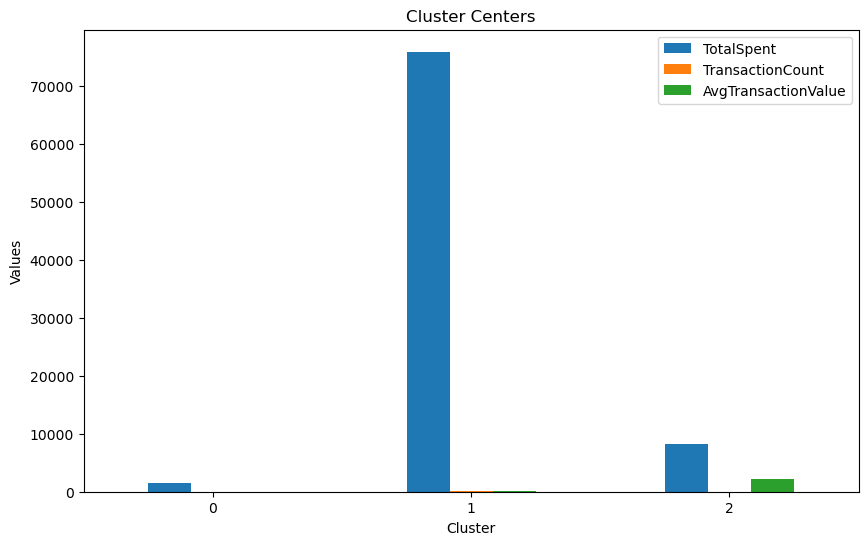

In [88]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_features_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['TotalSpent', 'TransactionCount', 'AvgTransactionValue'])

cluster_centers_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

# K-Nearest Neighbors (KNN) Classification

In [92]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Ensure the features for clustering are correctly scaled and exist

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(
    customer_features[['TotalSpent', 'TransactionCount', 'AvgTransactionValue']]
)

# Fit the KMeans model with the optimal number of clusters
optimal_k = 3  # Replace this with the value determined by the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(customer_features_scaled)

# Add the cluster labels to the DataFrame
customer_features['Cluster'] = cluster_labels

# Confirm the column exists
print(customer_features.head())

# Prepare data for KNN
X = customer_features[['TotalSpent', 'TransactionCount', 'AvgTransactionValue']]
y = customer_features['Cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   CustomerID  TotalSpent  TransactionCount  AvgTransactionValue  Cluster
0     12346.0        0.00                 2             0.000000        0
1     12347.0     4310.00                 7            23.681319        0
2     12348.0     1797.24                 4            57.975484        0
3     12349.0     1757.55                 1            24.076027        0
4     12350.0      334.40                 1            19.670588        0


In [94]:
from sklearn.neighbors import KNeighborsClassifier

# Prepare data for KNN
X = customer_features[['TotalSpent', 'TransactionCount', 'AvgTransactionValue']]
y = customer_features['Cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print(f'KNN Classification Accuracy: {accuracy:.2f}')


KNN Classification Accuracy: 0.99


# Model Validation and Hyperparameter Tuning

In [95]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Evaluate K-Means clustering with different numbers of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    score = silhouette_score(customer_features_scaled, kmeans.labels_)
    print(f'Number of clusters: {k}, Silhouette Score: {score}')

# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Best model evaluation
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print(f'Optimized KNN Classification Accuracy: {accuracy:.2f}')


Number of clusters: 2, Silhouette Score: 0.9408567589860027
Number of clusters: 3, Silhouette Score: 0.9394295181344139
Number of clusters: 4, Silhouette Score: 0.7911042037507204
Number of clusters: 5, Silhouette Score: 0.8087919534233343
Number of clusters: 6, Silhouette Score: 0.6612963468603368
Number of clusters: 7, Silhouette Score: 0.6648177109497461
Number of clusters: 8, Silhouette Score: 0.7227628159863637
Number of clusters: 9, Silhouette Score: 0.6142232985433871
Number of clusters: 10, Silhouette Score: 0.6161999321416431
Best parameters: {'n_neighbors': 7}
Optimized KNN Classification Accuracy: 0.99
